new client is a popular chain of malls spread across many countries. 
The mall wishes to re-design its existing offers and marketing communications in one of its branches  to 
improve sales in one of its key markets,
# Good **customer segmentation** is needed. 

In [151]:
# import Libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler, OneHotEncoder , OrdinalEncoder
from sklearn.cluster import KMeans
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn import decomposition
import warnings


In [152]:
# Importing the data
file = "C:\\Users\\Mohannad.dawood\\Desktop\\Data_science_Projects\\Mall_Customers.csv"
data = pd.read_csv(file)
data.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [153]:
# Rename the name of columns 
data.rename({'Annual Income (k$)' : 'Income' ,  'Spending Score (1-100)' : 'Score'}, axis=1, inplace=True)
data.head(1)

,CustomerID,Gender,Age,Income,Score
0,1,Male,19,15,39


In [154]:
# explore the data and find if missing values and understand the features 
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  200 non-null    int64 
 1   Gender      200 non-null    object
 2   Age         200 non-null    int64 
 3   Income      200 non-null    int64 
 4   Score       200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Income,Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


As found, there are 200 records of customers with 5 features.
all the features are integers exept one is categorial which is Gender. 
categorial values need to be transfered to numerical values through Onehotencoder , and other values need to be standarized through StandardScale.

In [155]:
data_scale = data.loc[:,['Gender','Age','Income', 'Score']].copy()
scaler = StandardScaler( )
ohe = OneHotEncoder()
column = make_column_transformer((scaler,['Age','Income', 'Score'] ) , (ohe, ['Gender']), remainder='passthrough')
mod_data=column.fit_transform(data_scale)


to determine the right number of custiomer segmentations , We are going to to find out through visual estimations, and by Elbow methodes 

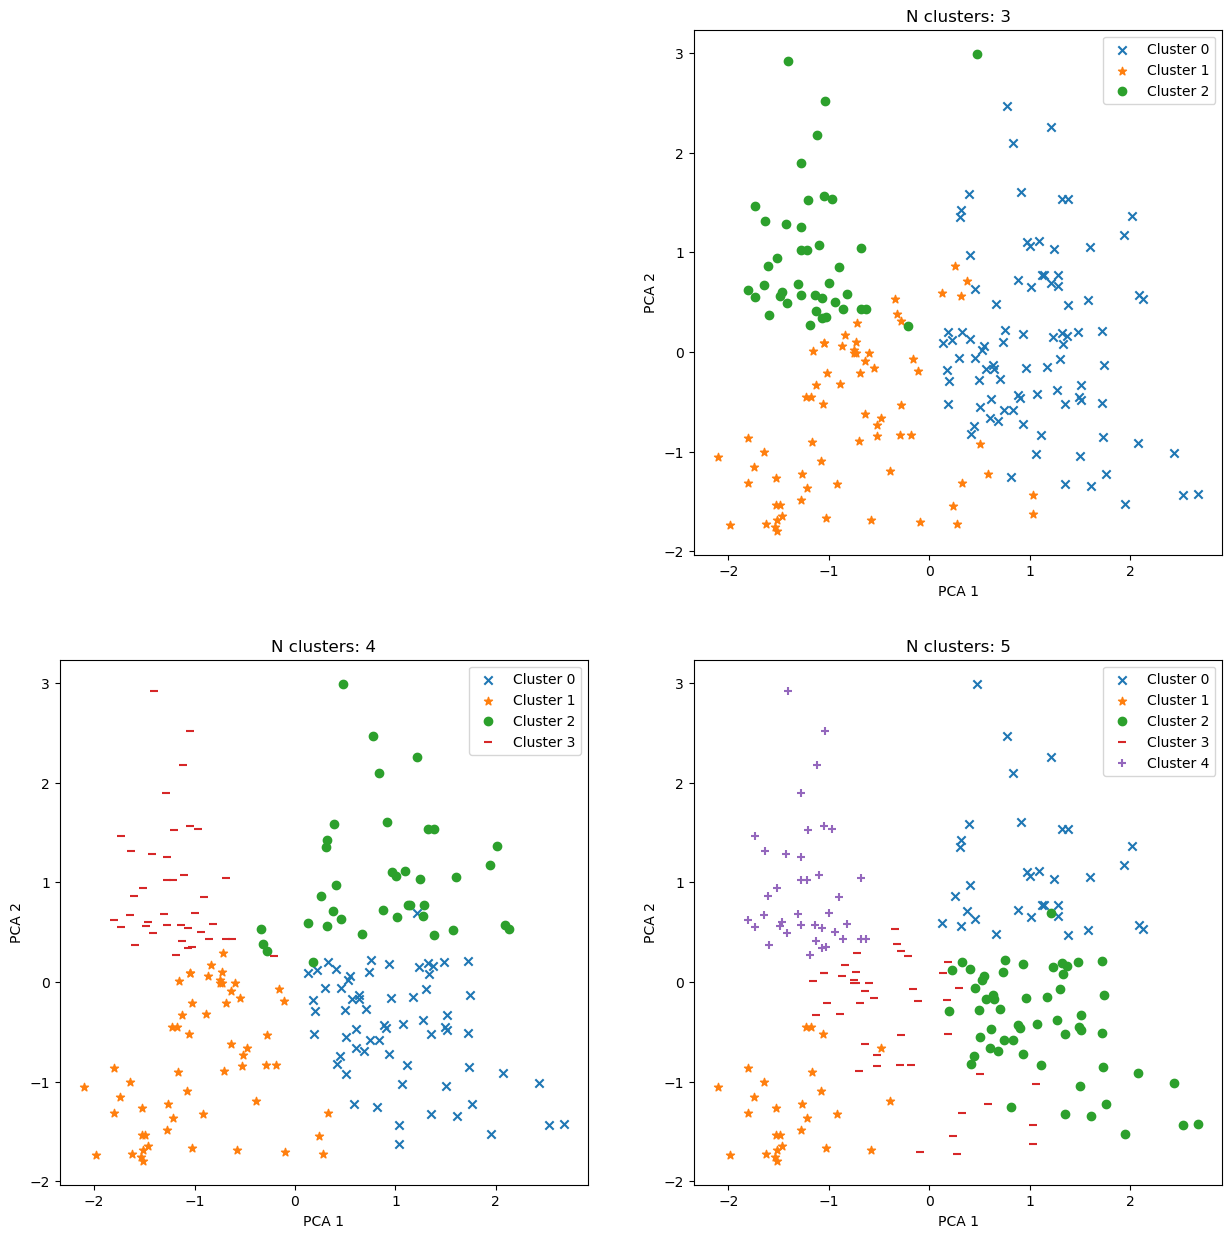

In [156]:
warnings.filterwarnings("ignore")
marks = ['x', '*', 'o','_','+']
fig= plt.figure(figsize=(15,15))

for n in range (3,6):
    cluster = KMeans(n_clusters=n,random_state=42)
    cluster.fit_transform(mod_data)
    data['class'] = cluster.predict(mod_data)
    pca= decomposition.PCA(n_components=2)
    data_pca = pca.fit_transform(mod_data)
    data['pca1'] = data_pca[:,0]
    data['pca2'] = data_pca[:,1]
    plt.subplot(2,2,n-1)
    for clust in range(n):
        temp=data[data['class']==clust]
        plt.scatter(temp['pca1'],temp['pca2'],marker=marks[clust],label="Cluster "+str(clust))
        plt.title("N clusters: "+str(n))
        plt.xlabel('PCA 1')
        plt.ylabel('PCA 2')
        plt.legend()
plt.show()

choosing the right number of segmentations depends on the overlaps and densly packed regions.
it seems that 4 segmentations have minimum overlap and more densly packed regions.

# Elbow method to determine the best segmentations number 

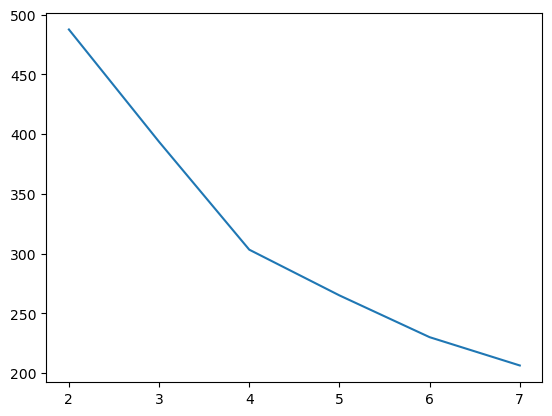

In [157]:
warnings.filterwarnings("ignore")
inertia_scores = []
for n in range(2,8):
    inertia = KMeans(n_clusters=n, random_state=42).fit(mod_data).inertia_
    inertia_scores.append(inertia)
plt.plot(range(2,8),inertia_scores)

we found that **Elbow** at 4 , witch mean our visual estimaation for the right number of segmentation matches the quantitive method ( Elbow) 

Let us explore the characteristics of each segmentation  

In [158]:
warnings.filterwarnings("ignore")
final_data = data.groupby(['class'])['Age','Income','Score'].mean()
final_data

,Age,Income,Score
class,,,
0,41.264706,88.500000,16.764706
1,24.592593,28.333333,74.740741
2,56.017857,48.750000,42.071429
3,29.340909,50.750000,43.022727
4,32.692308,86.538462,82.128205


In [159]:
data.groupby(['class'])['Gender'].value_counts()

class  Gender
0      Male      20
       Female    14
1      Male      14
       Female    13
2      Female    31
       Male      25
3      Female    33
       Male      11
4      Female    21
       Male      18
Name: Gender, dtype: int64

<Axes: xlabel='class'>

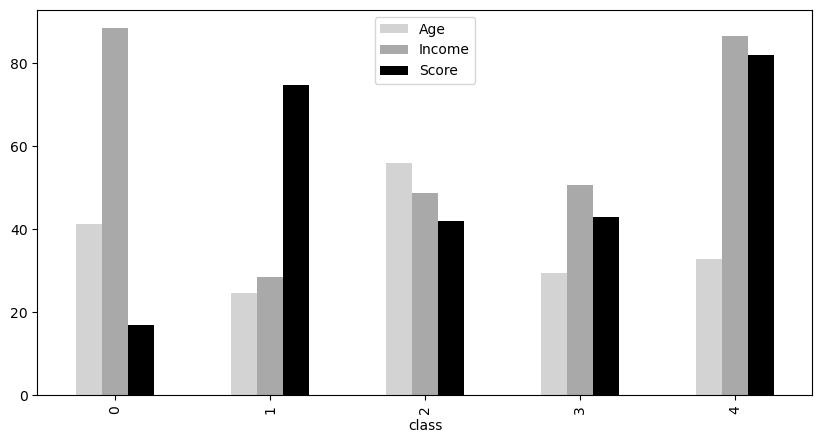

In [160]:
final_data.plot.bar(color=['lightgray', 'darkgray', 'black'], figsize=(10,5))

# Customer Segments 

### Group 0 :
- Name : olders and Moderate income 
- 60% female 
- this segment include old people , employees who are taking advantage of commulative salary increase due to thier long employment and experience in non creative business 
- they are carefull of their spending and looking for the vlaue of the products with competitive prices 
- their purchasing are due to necessaty or offers motivations 

### Group 1:
- Name : Youngers and High spenders 
- includes young people with moderate income but high spendings comparing with their income
- easy to be motivated, and convinced  , and has quick purchasing decision 
- going after the trandy products to be recognized and fufill the needs of acceptance 

### Group 2 :
- Name : rich youths and cheap
- inclues people in middle age with high salaries and low spending 
- people who have not interested products or they are not decision makers of purchasing available products in the mall

### Group 3 :
- Name : rich and high spenders 
- includes the perfect customer of mall business , and need to keep them as loyal customers 

# Conclusion 

According to the segnetations assumptions :
- Group 3 ( rich and high spenders) considered the main group with need to be recognized as loyal customers by offering continuous offers, and to study the line of products of their purchasing to be enriched and to offer wider options for them.
- need to focus on Group 2 as potential customers to enlarge customer average orders value 
- special offers to motivate Group 0 to maximize thier average orders value, and concentrate on competitive prices of their products.